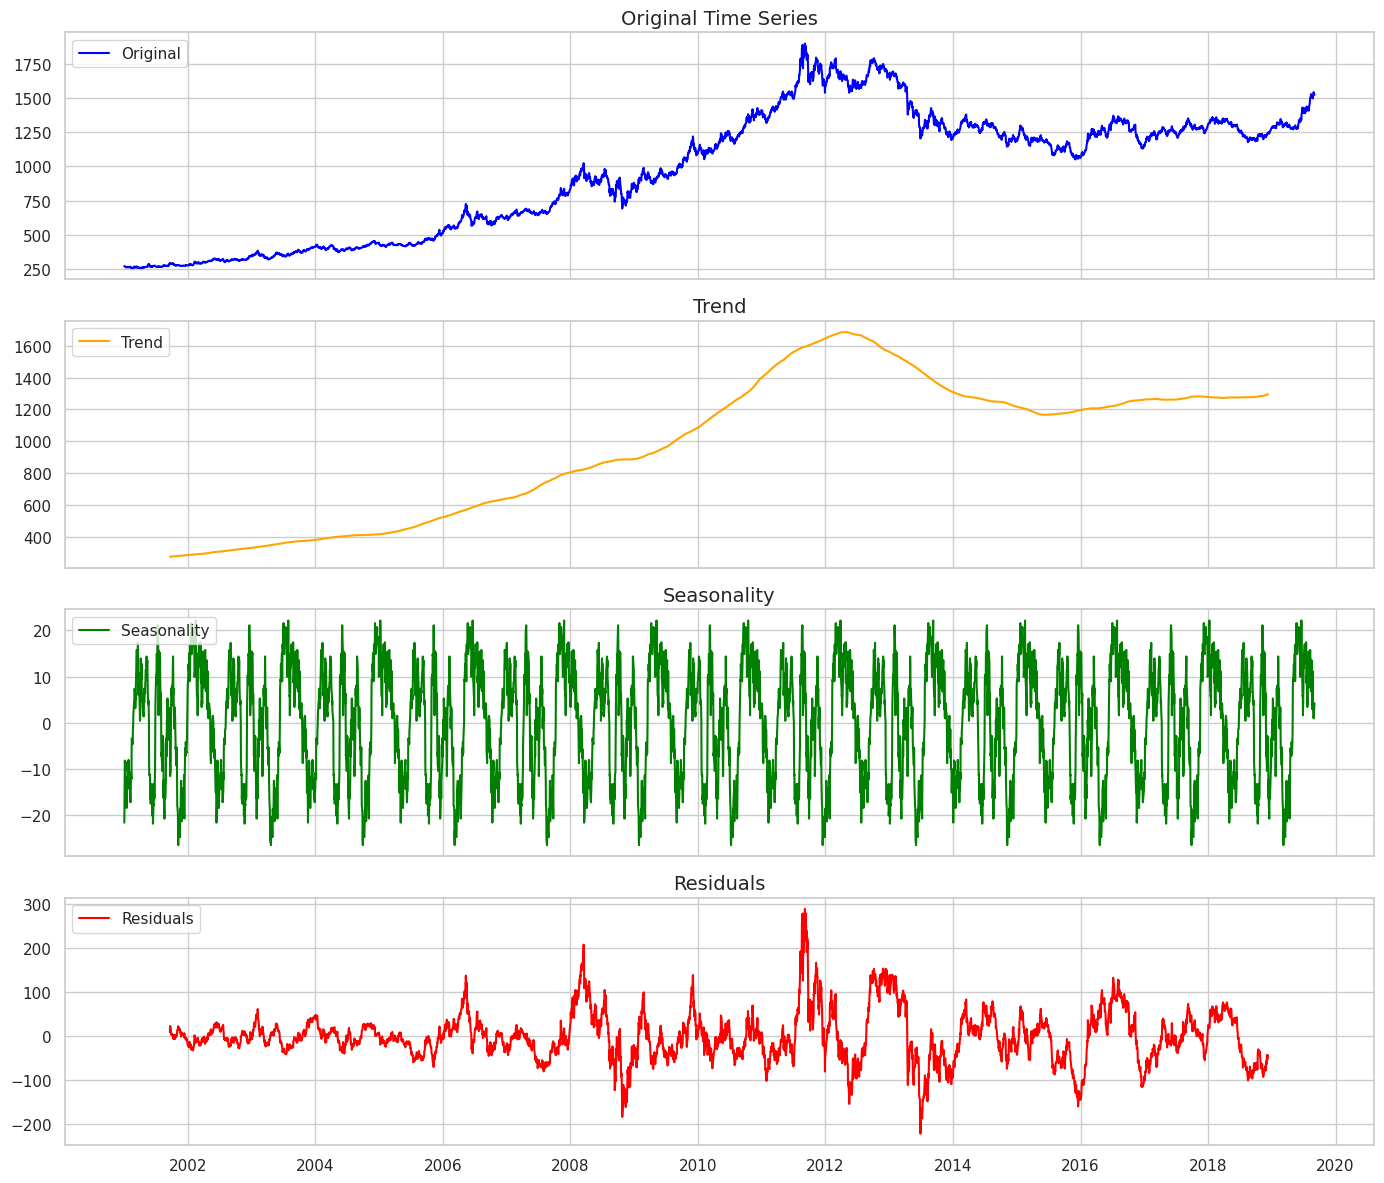

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = '/content/gold.csv'
gold_data = pd.read_csv(file_path)

# Process the data: select the 'Date' as index and a specific column (e.g., 'USD (AM)')
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

# Select the USD (AM) prices for decomposition
time_series = gold_data['USD (AM)'].dropna()

# Perform decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=365)  # Assuming daily data with yearly seasonality

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Original time series
axes[0].plot(time_series, label='Original', color='blue')
axes[0].set_title('Original Time Series', fontsize=14)
axes[0].legend(loc='upper left')

# Trend
axes[1].plot(trend, label='Trend', color='orange')
axes[1].set_title('Trend', fontsize=14)
axes[1].legend(loc='upper left')

# Seasonality
axes[2].plot(seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality', fontsize=14)
axes[2].legend(loc='upper left')

# Residuals
axes[3].plot(residual, label='Residuals', color='red')
axes[3].set_title('Residuals', fontsize=14)
axes[3].legend(loc='upper left')

# Improve spacing and add labels
plt.tight_layout()
plt.show()
